<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/supervised%20learning_regression_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 2차원 입력면 모델

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[66.94 57.51 37.74 59.72 54.2  44.65 52.93 56.77 61.05 66.17 57.17 69.53
 61.69 69.15 44.03 61.51]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


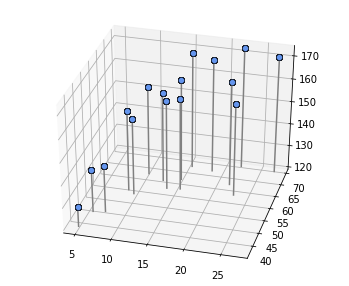

In [ ]:
##데이터 생성
import numpy as np
X_n=16
#X0: 나이, X1: 몸무게, T: 키
np.random.seed(seed=1) #난수 고정
X0=5+25*np.random.rand(X_n)
X0_min=5
X0_max=30
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X0)+4*np.random.randn(X_n)
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_min=40
X1_max=75

print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

##2차원 데이터 표시
def show_data2(ax,x0,x1,t):
  for i in range (len(x0)):
    ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[120,t[i]], color='gray')
    ax.plot(x0,x1,t,'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35,azim=-75)

##main
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
show_data2(ax,X0,X1,T)
plt.show()

나이, 몸무게가 커질 수록 키가 커짐을 알 수 있다.

**데이터 표시 방법**

데이터 번호=n, 벡터의 요소 (0=나이, 1=몸무게) 라고 한다면 x_n=(x_(n,0),x_(n,1)) 로 나타낼 수 있다.M차원으로 확장한다면 x_n=(X_(n,0),x_(n,1),...,x_(n,M-1)) 로 나타낼 수 있고 모든 데이터도 행렬로 표현할 수 있다.

**면 모델**

t 데이터 하나에 대하여 x 데이터가 2개씩 할당되어 있으므로 앞서 사용했던 직선 모델보다 면 모델을 이용하면 원래 있던 데이터 외에서도 나이, 몸무게에 따른 키 데이터 예측이 가능하다.

SD=12.995cm


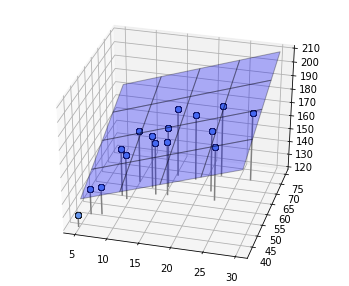

In [ ]:
##면의 표시
def show_plane(ax,w):
  px0=np.linspace(X0_min,X0_max,5)
  px1=np.linspace(X1_min,X1_max,5)
  px0,px1=np.meshgrid(px0,px1)
  y=w[0]*px0+w[1]*px1+w[2]
  ax.plot_surface(px0,px1,y,rstride=1,cstride=1,alpha=0.3,color='blue',edgecolor='black')

##면의 평균제곱오차 함수
def mse_plane(x0,x1,t,w):
  y=w[0]*x0+w[1]*x1+w[2]
  mse=np.mean((y-t)**2)
  return mse

#main
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=[1.5,1,90] #임의로 W (w0,w1,w2) 지정 :2D에서는 경사하강법 쓸 수 없음??
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()



**해석해**

데이터에 가장 적합한 W=[w0,w1,w2] 를 구하기 위해서는 앞서 직선모델에서 사용했던 방법과 같이 평균제곱오차함수 J를 구하고 J에 대하여 w0,w1,w2를 각각 편미분한 값이 0임을 이용해서 J가 최소가 되는 W를 구할 수 있다.

[ ]: 평균 / var(a)=[a^2]-[a]^2 : 분산 / cov(a,b)=[ab]-[a][b] : 공분산 이라고 하면

(a의 분산: a와 얼마나 차이가 있는지 / a,b의 공분산: a,b가 서로 얼마나 영향을 끼치는지)

w0={cov(t,x1)cov(x0,x1)-var(x1)cov(t,x0)}/{cov(x0,x1)^2-var(x0)var(x1)}

w1={cov(t,x0)cov(x0,x1)-var(x0)cov(t,x1)}/{cov(x0,x1)^2-var(x0)var(x1)}

w2=-w0[x0]-w1[x1]+[t]

가 된다.

w0=0.167, w1=1.254, w2=83.750
SD=2.006 cm


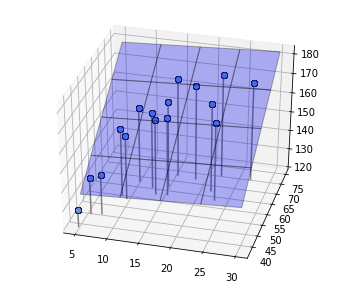

In [ ]:
##해석해
def fit_plane(x0,x1,t):
  co_tx1=np.mean(t*x1)-np.mean(t)*np.mean(x1)
  co_x0x1=np.mean(x0*x1)-np.mean(x0)*np.mean(x1)
  co_tx0=np.mean(t*x0)-np.mean(t)*np.mean(x0)
  va_x1=np.var(x1)
  va_x0=np.var(x0)
  w0=(co_tx1*co_x0x1-va_x1*co_tx0)/(co_x0x1**2-va_x0*va_x1)
  w1=(co_tx0*co_x0x1-va_x0*co_tx1)/(co_x0x1**2-va_x0*va_x1)
  w2=-w0*np.mean(x0)-w1*np.mean(x1)+np.mean(t)
  return np.array([w0,w1,w2])

##main
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=fit_plane(X0,X1,T)
print("w0={0:.3f}, w1={1:.3f}, w2={2:.3f}".format(W[0],W[1],W[2]))
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


면 모델 목차에서 임의의 W를 집어넣어 구한 것보다 오차가 더 적은 것으로 보아 정확도가 높아진 것을 볼 수 있다.